## Airbnb Exploratory analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)

### Importing data

In [3]:
df=pd.read_csv("Airbnb prices.csv")
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


### Exploratory Analysis

* Room types available

In [4]:
df["room_type"].value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

* Dropping the Shared room data as they represent a very low percentage

In [5]:
df1=df[df["room_type"]!="Shared room"]
df1["room_type"].value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

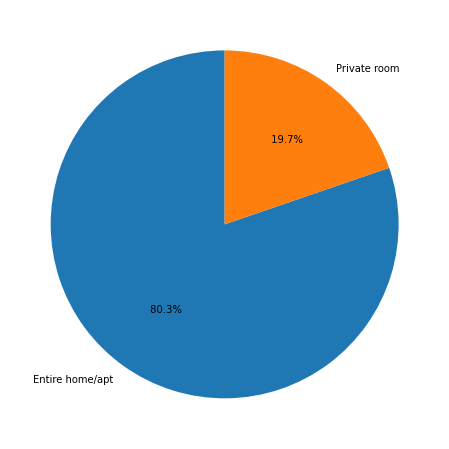

In [6]:
fig, ax =plt.subplots(figsize=(8,8))
ax=plt.pie(df1["room_type"].value_counts(),labels=["Entire home/apt","Private room"],autopct="% 1.1f%%",startangle=90)

* neighborhoods available

In [7]:
df1["neighborhood"].value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

Text(0.5, 1.0, 'neighborhoods available')

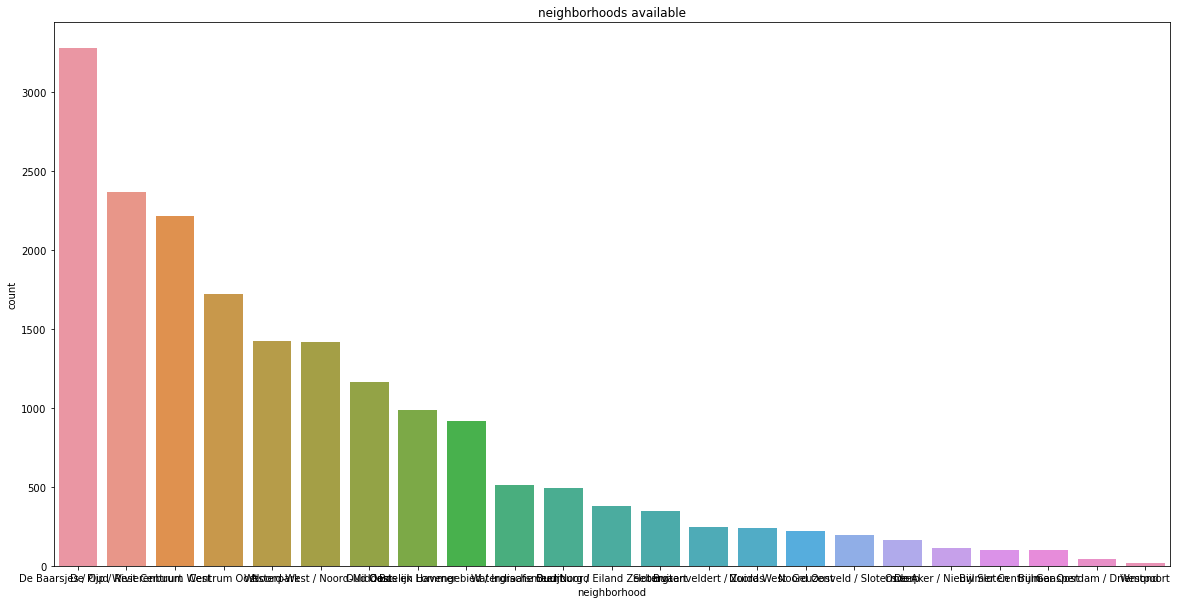

In [17]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(data=df1,x="neighborhood",order=df1["neighborhood"].value_counts().index)
plt.title("neighborhoods available")

* Number of reviews

In [18]:
df1["reviews"].value_counts()

0      2975
1      1500
2      1238
3      1100
4       924
       ... 
390       1
166       1
323       1
201       1
188       1
Name: reviews, Length: 283, dtype: int64

* Overall Satisfaction frequency

In [19]:
df1["overall_satisfaction"].value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

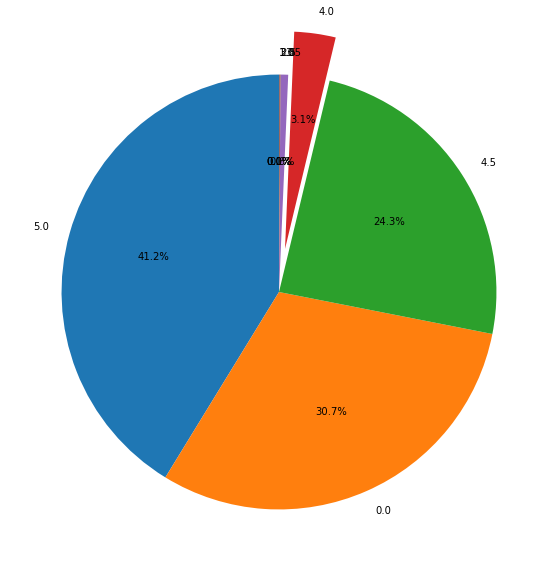

In [20]:
fig,ax=plt.subplots(figsize=(10,10))
explode = [0,0,0,0.2,0,0,0,0]
ax=plt.pie(df1["overall_satisfaction"].value_counts(),labels=df1["overall_satisfaction"].unique(),startangle=90,autopct="%1.1f%%"
,explode=explode)


* Zero rating list

In [21]:
df_zero=df1[df1["overall_satisfaction"]==0]
df_zero.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.721000e+03,5721.0,5.721000e+03,0.0,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,1.472219e+07,1476.0,4.674155e+07,NaN,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,5.209774e+06,0.0,4.424869e+07,NaN,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,1.150164e+07,1476.0,9.749992e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,1.643578e+07,1476.0,2.962380e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,1.917347e+07,1476.0,7.652614e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


* 3 bedrooms rating

In [22]:
df_3_bedrooms=pd.DataFrame(df1.loc[df1["bedrooms"]==3,"overall_satisfaction"])
df_3_bedrooms["overall_satisfaction"].value_counts()

0.0    635
5.0    515
4.5    266
4.0     22
3.5      5
2.5      1
Name: overall_satisfaction, dtype: int64

<AxesSubplot:xlabel='overall_satisfaction', ylabel='count'>

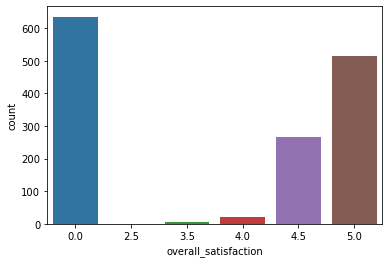

In [23]:
sns.countplot(data=df_3_bedrooms,x="overall_satisfaction")


* 2 bedrooms rating

In [24]:
df_2_bedrooms=pd.DataFrame(df1.loc[df1["bedrooms"]==2,"overall_satisfaction"])
df_2_bedrooms["overall_satisfaction"].value_counts()

5.0    1787
0.0    1487
4.5    1033
4.0     127
3.5      16
3.0       6
Name: overall_satisfaction, dtype: int64

<AxesSubplot:xlabel='overall_satisfaction', ylabel='count'>

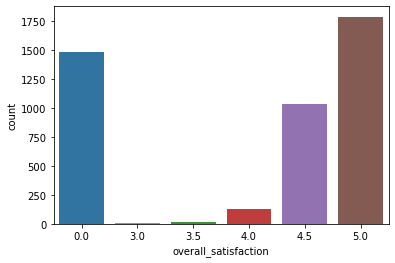

In [25]:
sns.countplot(data=df_2_bedrooms,x="overall_satisfaction")

* Rating whenever the price between 150 and 180

In [26]:
df_150=df1[df1["price"]>150]
df_150_180=df_150[df_150["price"]<180]
df_150_180["overall_satisfaction"].value_counts()

5.0    954
0.0    639
4.5    514
4.0     67
3.5      8
3.0      2
Name: overall_satisfaction, dtype: int64

* Assumig that zero rating is an account for no rating and replace the 0 with the common rating "4"

In [27]:
df_imputated=df1.copy()
df_imputated.loc[df["overall_satisfaction"]==0]=4
df_imputated

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4.0,4.0,4.0,4,4,4.000000,4.000000,4
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4.0,4.0,4.0,4,4,4.000000,4.000000,4
37,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4.0,4.0,4.0,4,4,4.000000,4.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,17789893,1476,47501089,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,10,5.0,3,1.0,NaN,32.0,NaN,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,1476,67093870,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,6,5.0,4,1.0,NaN,24.0,NaN,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4.0,4.0,4.0,4,4,4.000000,4.000000,4
18721,17132164,1476,115156569,Private room,NaN,Amsterdam,NaN,Centrum West,13,4.5,2,1.0,NaN,36.0,NaN,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...


In [28]:
df_imputated["overall_satisfaction"].value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

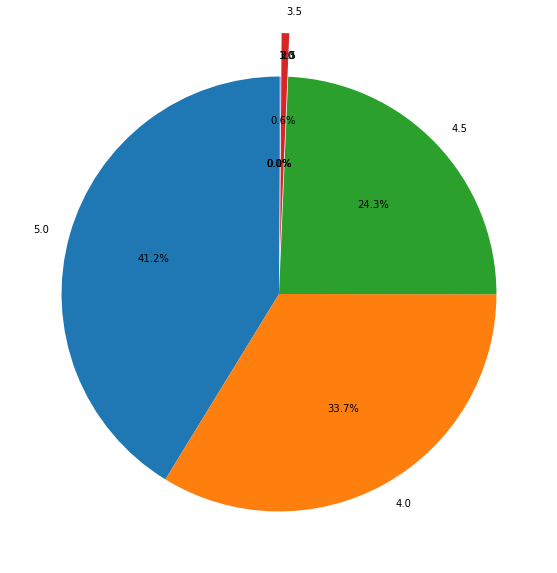

In [29]:
fig,ax=plt.subplots(figsize=(10,10))
explode = [0,0,0,0.2,0,0,0]
ax=plt.pie(df_imputated["overall_satisfaction"].value_counts(),labels=df_imputated["overall_satisfaction"].unique(),startangle=90,autopct="%1.1f%%"
,explode=explode)

* Accomodation availability

In [30]:
df1["accommodates"].value_counts()

2     9996
4     5563
3     1583
6      475
5      470
1      355
8      105
7       52
16      18
10      16
12       9
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

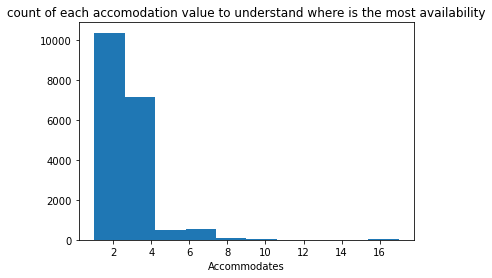

In [31]:

plt.hist(df1["accommodates"])
plt.title("count of each accomodation value to understand where is the most availability")
plt.xlabel("Accommodates")
plt.show()

* Most Common Price

In [32]:
df1["price"].value_counts().head()

119.0    1023
180.0     999
144.0     886
150.0     621
132.0     587
Name: price, dtype: int64

* Numbers and propotions of bedrooms

In [33]:
bedrooms=pd.crosstab(df1["bedrooms"],columns="counts",normalize=True)
bedrooms

col_0,counts
bedrooms,
0.0,0.061844
1.0,0.591533
2.0,0.238800
3.0,0.077385
4.0,0.025348
5.0,0.003323
6.0,0.001018
7.0,0.000214
8.0,0.000161


* Dropping properties with 0 bedrooms

In [34]:
df_w_bedrooms=df1.loc[df1["bedrooms"]!=0]
df_w_bedrooms

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,17789893,1476,47501089,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,10,5.0,3,1.0,NaN,32.0,NaN,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,1476,67093870,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,6,5.0,4,1.0,NaN,24.0,NaN,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,19859427,1476,29724632,Private room,NaN,Amsterdam,NaN,Geuzenveld / Slotermeer,0,0.0,1,1.0,NaN,38.0,NaN,Private single room,2017-07-22 16:05:14.149610,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18721,17132164,1476,115156569,Private room,NaN,Amsterdam,NaN,Centrum West,13,4.5,2,1.0,NaN,36.0,NaN,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...


In [35]:
w_bedrooms=pd.crosstab(df_w_bedrooms["bedrooms"],columns="counts",normalize=True)
w_bedrooms

col_0,counts
bedrooms,
1.0,0.630527
2.0,0.254541
3.0,0.082486
4.0,0.027019
5.0,0.003542
6.0,0.001085
7.0,0.000228
8.0,0.000171
9.0,0.000114


* Reviews frequency

Text(0.5, 1.0, ' histogram of reviews where bins are 20 and range is between 0 to 100.')

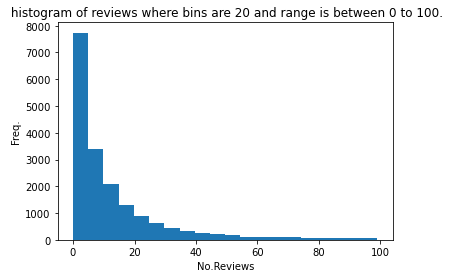

In [50]:
reviws_100=df1[df1["reviews"]<100]
plt.hist(reviws_100["reviews"], bins=20)
plt.xlabel("No.Reviews")
plt.ylabel("Freq.")
plt.title(" histogram of reviews where bins are 20 and range is between 0 to 100.")
#plt.hist(,bins=20)

Text(0.5, 1.0, ' histogram of reviews where bins are 20 and range is between 0 to 1000.')

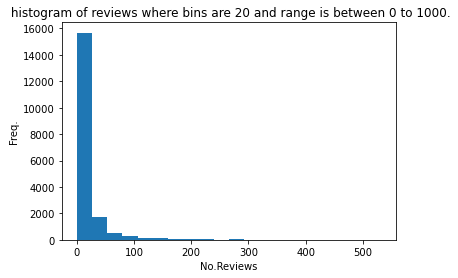

In [52]:
reviws_1000=df1[df1["reviews"]<1000]
plt.hist(reviws_1000["reviews"], bins=20)
plt.xlabel("No.Reviews")
plt.ylabel("Freq.")
plt.title(" histogram of reviews where bins are 20 and range is between 0 to 1000.")

* histogram of accommodates

Text(0.5, 0, 'No. accommodates')

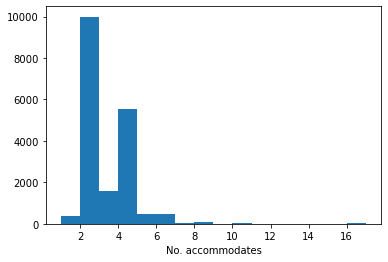

In [55]:
plt.hist(df1["accommodates"],bins=16)
plt.xlabel("No. accommodates")

* histogram of overall_satisfaction.

Text(0.5, 0, 'Rating')

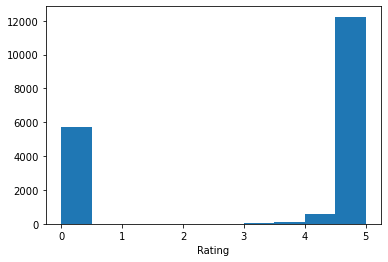

In [56]:
plt.hist(df1["overall_satisfaction"])
plt.xlabel("Rating")

* overall_satisfaction based on the price

Text(0.5, 1.0, 'Rating for the properties with price from 100 to 200')

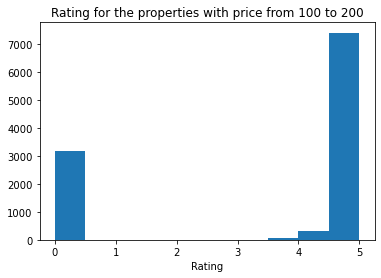

In [66]:
df_100_200_price=df1[df1["price"].between(100,200,inclusive="right")]
plt.hist(df_100_200_price["overall_satisfaction"])
plt.xlabel("Rating")
plt.title("Rating for the properties with price from 100 to 200")

Text(0.5, 1.0, 'Rating for the properties with price greater than 200')

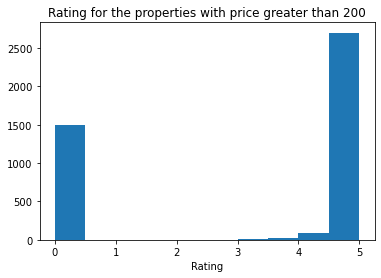

In [67]:
df_more_than_200_price=df1[df1["price"]>200]
plt.hist(df_more_than_200_price["overall_satisfaction"])
plt.xlabel("Rating")
plt.title("Rating for the properties with price greater than 200")

* Discovering correlation between variables

In [68]:
df1.corr()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
room_id,1.000000,NaN,0.535218,NaN,NaN,-0.390279,-0.386031,-0.002451,-0.029074,NaN,-0.007968,NaN,-0.032478,0.010366
survey_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.535218,NaN,1.000000,NaN,NaN,-0.183130,-0.203480,0.013934,-0.016802,NaN,-0.016467,NaN,-0.026868,0.010497
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews,-0.390279,NaN,-0.183130,NaN,NaN,1.000000,0.316359,-0.062661,-0.114755,NaN,-0.084763,NaN,0.050281,-0.012449
overall_satisfaction,-0.386031,NaN,-0.203480,NaN,NaN,0.316359,1.000000,-0.053988,-0.088458,NaN,-0.045524,NaN,0.041489,-0.018138
accommodates,-0.002451,NaN,0.013934,NaN,NaN,-0.062661,-0.053988,1.000000,0.717244,NaN,0.502999,NaN,0.001586,0.104743
bedrooms,-0.029074,NaN,-0.016802,NaN,NaN,-0.114755,-0.088458,0.717244,1.000000,NaN,0.446049,NaN,-0.011126,0.095557
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


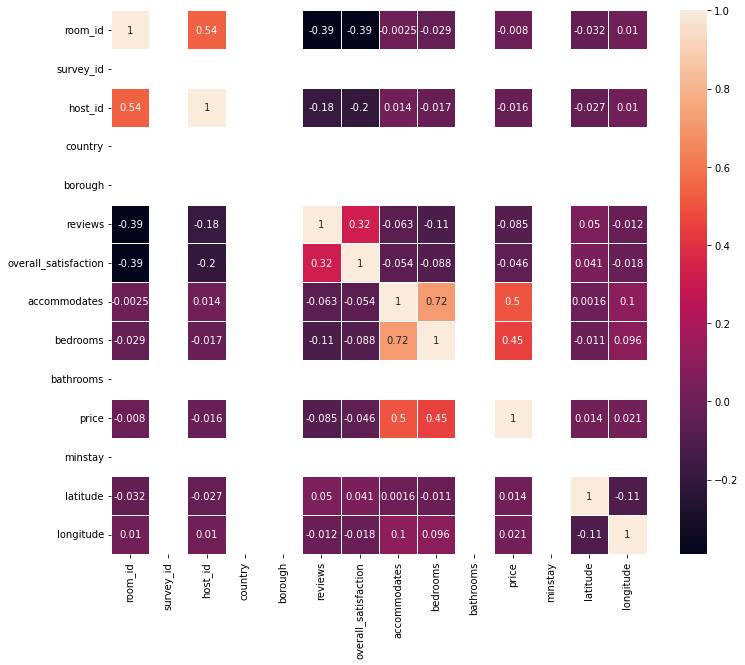

In [71]:
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(df1.corr(),annot=True,linewidths=0.5)